# Comparison with different CPU Frequencies

In [48]:
def parse_line(txtf):
    f = open(txtf, 'r')
    x = f.read().split('\n')
    x=filter(None,x)
    x = [int(i.split(':')[1]) for i in x]
    return x

In [86]:
knl_cpu=parse_line('cpu_knl.txt')
has_cpu=parse_line('cpu_has.txt')
print len(knl_cpu),knl_cpu
print "\n"
print len(has_cpu),has_cpu

18 [1401000, 1401000, 1401000, 1400000, 1400000, 1400000, 1300000, 1300000, 1300000, 1200000, 1200000, 1200000, 1100000, 1100000, 1100000, 1000000, 1000000, 1000000]


39 [2301000, 2301000, 2301000, 2300000, 2300000, 2300000, 2200000, 2200000, 2200000, 2100000, 2100000, 2100000, 2000000, 2000000, 2000000, 1900000, 1900000, 1900000, 1800000, 1800000, 1800000, 1700000, 1700000, 1700000, 1600000, 1600000, 1600000, 1500000, 1500000, 1500000, 1400000, 1400000, 1400000, 1300000, 1300000, 1300000, 1200000, 1200000, 1200000]


In [87]:
import numpy as np
knl_cpu1=np.mean(np.asarray(knl_cpu).reshape(-1, 3), axis=1)
has_cpu1=np.mean(np.asarray(has_cpu).reshape(-1, 3), axis=1)

In [88]:
has_io=[1.1*1024,939,1.0*1024,861,890,968,863,896,933,900,829,901,840,894,778,845,
        783,861,871,780,770,669,814,812,793,623,788,719,727,604,
686,693,714,546,665,687,637,602,600]
knl_io=[306,298,326,304,300,291,275,275,288,262,271,267,244,250,245,229,213,226]
knl_io_avg=np.mean(np.asarray(knl_io).reshape(-1, 3), axis=1)
has_io_avg=np.mean(np.asarray(has_io).reshape(-1, 3), axis=1)
knl_io_min=np.min(np.asarray(knl_io).reshape(-1, 3), axis=1)
has_io_min=np.min(np.asarray(has_io).reshape(-1, 3), axis=1)
knl_io_max=np.max(np.asarray(knl_io).reshape(-1, 3), axis=1)
has_io_max=np.max(np.asarray(has_io).reshape(-1, 3), axis=1)

In [89]:
print knl_io_avg
print knl_io_min
print knl_io_max
knl_cpu1 =[i/1000000 for i in knl_cpu1]
has_cpu1 =[i/1000000 for i in has_cpu1]

[ 310.          298.33333333  279.33333333  266.66666667  246.33333333
  222.66666667]
[298 291 275 262 244 213]
[326 304 288 271 250 229]


[2.3010000000000002, 2.2999999999999998, 2.2000000000000002, 2.1000000000000001, 2.0, 1.8999999999999999, 1.8, 1.7, 1.6000000000000001, 1.5, 1.3999999999999999, 1.3, 1.2]
[1.401, 1.3999999999999999, 1.3, 1.2, 1.1000000000000001, 1.0]
16


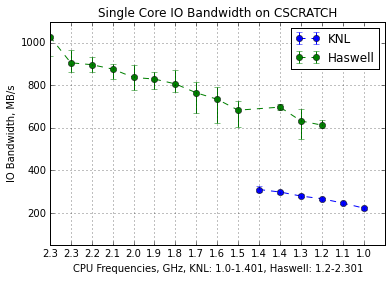

In [142]:
print has_cpu1
print knl_cpu1
all_cpu=[2.3010000000000002, 2.2999999999999998, 2.2000000000000002, 
         2.1000000000000001, 2.0, 1.8999999999999999, 
         1.8, 1.7, 1.6000000000000001, 1.5, 1.401, 
         1.3999999999999999, 1.3, 1.2,1.1000000000000001, 1.0]
print len(all_cpu)
has_x=[0,1,2,3,4,5,6,7,8,9,11,12,13]

knl_x=[10,11,12,13,14,15]
has_labels=["{0:.1f}".format(x) for x in has_cpu1]
knl_labels=["{0:.1f}".format(x) for x in knl_cpu1]
#plt.xticks(has_x,has_labels)

plt.errorbar(knl_x,knl_io_avg, [knl_io_avg-knl_io_min, knl_io_max-knl_io_avg], fmt='--o', label="KNL")

plt.errorbar(has_x,has_io_avg, [has_io_avg-has_io_min, has_io_max-has_io_avg], fmt='--o', label="Haswell")

#plt.xticks(knl_x,knl_labels)
all_labels=["{0:.1f}".format(x) for x in all_cpu]

plt.xticks(range(16),all_labels)
plt.xlabel('CPU Frequencies, GHz, KNL: 1.0-1.401, Haswell: 1.2-2.301')
plt.ylabel('IO Bandwidth, MB/s')
plt.title('Single Core IO Bandwidth on CSCRATCH')
#plt.yscale('logit')
plt.grid(True)
plt.ylim(50,1100)
plt.legend()